In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [14]:
import pandas as pd
df = pd.read_csv("game.csv")
print(df)

       -14.00925916       431.9       0.2        0
0        -14.009259  431.700000  0.300000  0.04000
1        -14.049259  431.400000  0.400000  0.00000
2        -14.049259  431.000000  0.500000  0.04000
3        -14.089259  430.500000  0.600000  0.00000
4        -14.089259  429.900000  0.700000  0.04000
...             ...         ...       ...      ...
14555     -6.750964   86.577350  4.127327  2.77887
14556     -9.529833   82.450023  4.227327  2.73887
14557    -12.268703   78.222697  4.327327  2.69887
14558    -14.967573   73.895370  4.427327  2.65887
14559    -17.626442   69.468043  4.527327  2.61887

[14560 rows x 4 columns]


In [15]:
df.columns = ["Input_X", "Input_Y", "Velocity_X", "Velocity_Y"]
df

,Input_X,Input_Y,Velocity_X,Velocity_Y
0,-14.009259,431.700000,0.300000,0.04000
1,-14.049259,431.400000,0.400000,0.00000
2,-14.049259,431.000000,0.500000,0.04000
3,-14.089259,430.500000,0.600000,0.00000
4,-14.089259,429.900000,0.700000,0.04000
...,...,...,...,...
14555,-6.750964,86.577350,4.127327,2.77887
14556,-9.529833,82.450023,4.227327,2.73887
14557,-12.268703,78.222697,4.327327,2.69887
14558,-14.967573,73.895370,4.427327,2.65887


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df

,Input_X,Input_Y,Velocity_X,Velocity_Y
0,0.459912,0.929354,0.345424,0.554083
1,0.459885,0.928593,0.355204,0.549890
2,0.459885,0.927577,0.364984,0.554083
3,0.459858,0.926308,0.374765,0.549890
4,0.459858,0.924786,0.384545,0.554083
...,...,...,...,...
14555,0.464823,0.053419,0.719747,0.841189
14556,0.462943,0.042944,0.729528,0.836996
14557,0.461090,0.032215,0.739308,0.832803
14558,0.459264,0.021232,0.749088,0.828610


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit(df)
scaled_data = model.transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

scaled_data

,Input_X,Input_Y,Velocity_X,Velocity_Y
0,-0.191159,1.826038,-0.610993,-0.072691
1,-0.191291,1.822461,-0.544359,-0.097906
2,-0.191291,1.817692,-0.477726,-0.072691
3,-0.191423,1.811731,-0.411092,-0.097906
4,-0.191423,1.804577,-0.344458,-0.072691
...,...,...,...,...
14555,-0.167170,-2.288766,1.939294,1.653865
14556,-0.176354,-2.337975,2.005928,1.628650
14557,-0.185406,-2.388376,2.072562,1.603434
14558,-0.194326,-2.439970,2.139195,1.578219


In [18]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Input_X     14560 non-null  float64
 1   Input_Y     14560 non-null  float64
 2   Velocity_X  14560 non-null  float64
 3   Velocity_Y  14560 non-null  float64
dtypes: float64(4)
memory usage: 455.1 KB


In [19]:
scaled_df.duplicated().sum()

0

<Axes: >

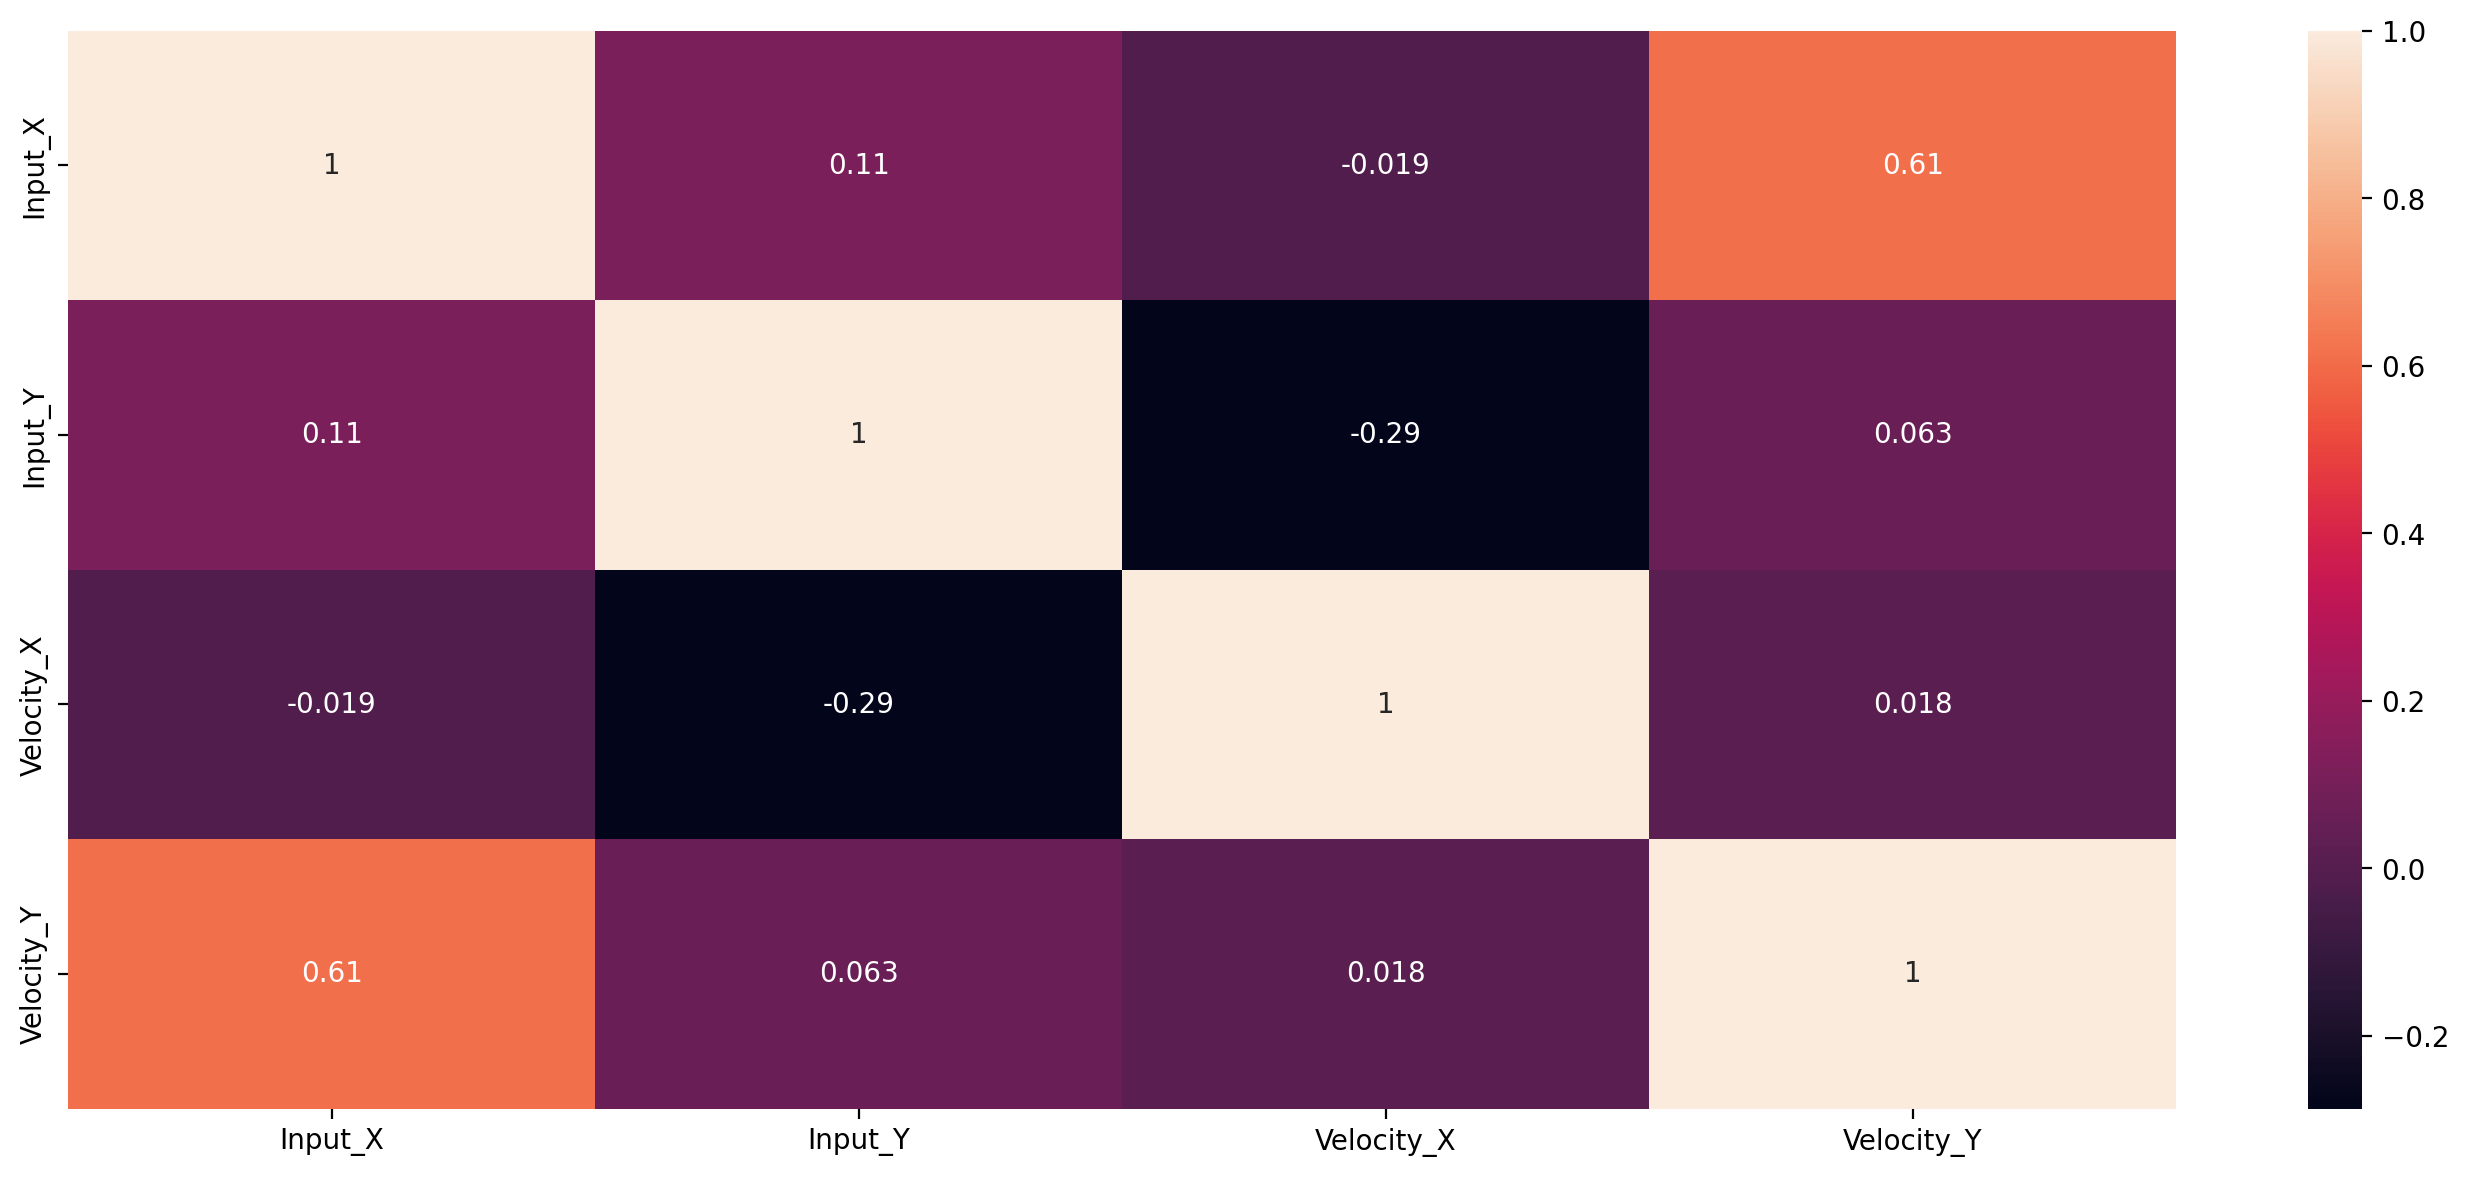

In [21]:
plt.figure(figsize = (17,7), dpi=200)
sns.heatmap(scaled_df.corr(), annot = True)

In [22]:
X = scaled_df[['Input_X', 'Input_Y']].values
Y = scaled_df[['Velocity_X', 'Velocity_Y']].values

print(X)
print(Y)

[[0.45991205 0.92935407]
 [0.45988499 0.92859266]
 [0.45988499 0.92757744]
 ...
 [0.46108961 0.03221458]
 [0.45926372 0.02123165]
 [0.45746489 0.00999492]]
[[0.34542382 0.55408325]
 [0.3552041  0.54989019]
 [0.36498439 0.55408325]
 ...
 [0.73930788 0.83280333]
 [0.74908816 0.82861027]
 [0.75886845 0.82441721]]


In [193]:
X1 = scaled_data[['Input_X', 'Input_Y']].values
Y1 = scaled_data[['Velocity_X', 'Velocity_Y']].values

print(X1)
print(Y1)

[[-0.19115855  1.82603812]
 [-0.19129075  1.8224613 ]
 [-0.19129075  1.81769221]
 ...
 [-0.18540601 -2.38837626]
 [-0.19432577 -2.43996981]
 [-0.20311333 -2.49275562]]
[[-0.61099301 -0.07269079]
 [-0.54435936 -0.09790639]
 [-0.47772571 -0.07269079]
 ...
 [ 2.07256165  1.60343414]
 [ 2.1391953   1.57821854]
 [ 2.20582895  1.55300294]]


## Splitting Data

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [196]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.30)

In [24]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (10920, 2)
Training Labels Shape :  (10920, 2)
Testing Data Shape    :  (3640, 2)
Testing Labels Shape  :  (3640, 2)


In [197]:
print('Training Data Shape   : ', x1_train.shape)
print('Training Labels Shape : ', y1_train.shape)
print('Testing Data Shape    : ', x1_test.shape)
print('Testing Labels Shape  : ', y1_test.shape)

Training Data Shape   :  (10192, 2)
Training Labels Shape :  (10192, 2)
Testing Data Shape    :  (4368, 2)
Testing Labels Shape  :  (4368, 2)


## KNN method

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 10)#(n_neighbors = 5)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [50]:
print('Training Set Score : ', knn_reg.score(x_train, y_train))
print('Testing Set Score  : ', knn_reg.score(x_test, y_test))

Training Set Score :  0.7681103537980034
Testing Set Score  :  0.701110584042538


## Decision Trees

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth = 8, random_state = 2)
dt_reg.fit(x_train, y_train)

print('Training Set Score : ', dt_reg.score(x_train, y_train))
print('Testing Set Score  : ', dt_reg.score(x_test, y_test))

Training Set Score :  0.6884905925359155
Testing Set Score  :  0.6453390408008307


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF_Regressor = RandomForestRegressor(n_estimators = 20, max_depth = 9, random_state = 2)
RF_Regressor.fit(x_train, y_train)

print('Training Set Score : ', RF_Regressor.score(x_train, y_train))
print('Testing Set Score  : ', RF_Regressor.score(x_test, y_test))

Training Set Score :  0.7534632486842799
Testing Set Score  :  0.7062689014278045


## XGBoost

In [73]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(n_estimators = 20)
xg_reg.fit(x_train, y_train)

print('Training Set Score : ', xg_reg.score(x_train, y_train))
print('Testing Set Score  : ', xg_reg.score(x_test, y_test))

Training Set Score :  0.7581167215156438
Testing Set Score  :  0.7072311825040474


## ANN Architecture

In [116]:
model = tf.keras.models.Sequential()
model.add(Dense(8, input_shape=(2,)))
model.add(Dense(16, activation='linear'))
#model.add(Dense(16, activation='linear'))
model.add(Dense(2))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 24        
                                                                 
 dense_28 (Dense)            (None, 16)                144       
                                                                 
 dense_29 (Dense)            (None, 2)                 34        
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


## Compiling ANN model

In [117]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

## Fitting the model

In [118]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 25,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
437/437 [==============================] - 2s 4ms/step - loss: 0.1915 - accuracy: 0.6486 - val_loss: 0.1063 - val_accuracy: 0.7069
Epoch 2/10
437/437 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.7071 - val_loss: 0.1058 - val_accuracy: 0.7055
Epoch 3/10
437/437 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.7063 - val_loss: 0.1056 - val_accuracy: 0.7058
Epoch 4/10
437/437 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.7055 - val_loss: 0.1059 - val_accuracy: 0.7091
Epoch 5/10
437/437 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.7046 - val_loss: 0.1075 - val_accuracy: 0.7060
Epoch 6/10
437/437 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.7082 - val_loss: 0.1063 - val_accuracy: 0.7071
Epoch 7/10
437/437 [==============================] - 2s 3ms/step - loss: 0.1065 - accuracy: 0.7061 - val_loss: 0.1057 - val_accuracy: 0.7025
Epoch 

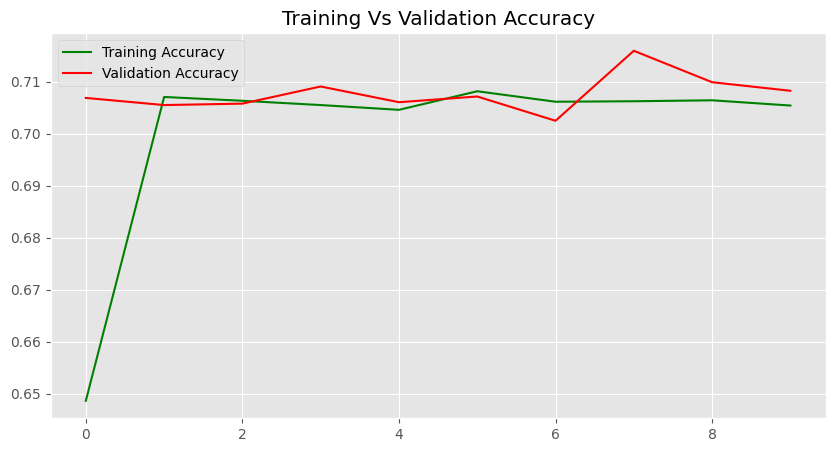

In [119]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

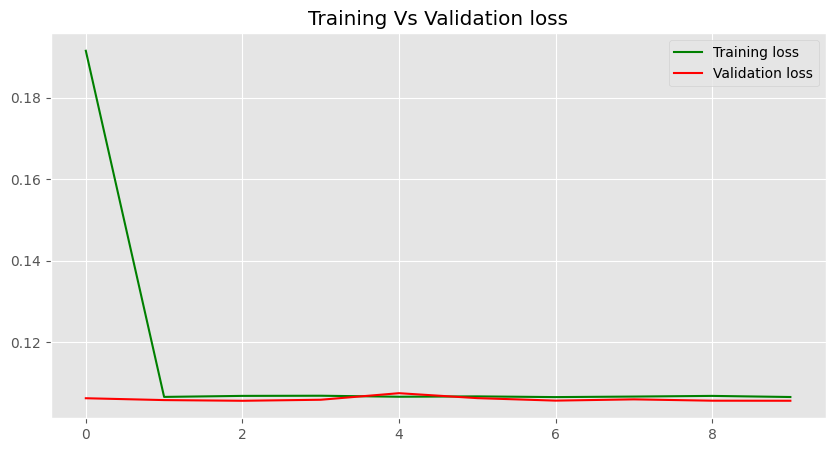

In [120]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()

## Using Relu ANN

In [212]:
model = tf.keras.models.Sequential()
model.add(Dense(8, input_shape=(2,)))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(8, activation='linear'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 8)                 24        
                                                                 
 dense_88 (Dense)            (None, 32)                288       
                                                                 
 dense_89 (Dense)            (None, 2)                 66        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [213]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

In [214]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [215]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 30,
    epochs = 200,
    callbacks=[callback],
    verbose = 1
)

Epoch 1/200
364/364 [==============================] - 4s 9ms/step - loss: 0.1050 - accuracy: 0.7158 - val_loss: 0.1007 - val_accuracy: 0.7102
Epoch 2/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0966 - accuracy: 0.7339 - val_loss: 0.0963 - val_accuracy: 0.7390
Epoch 3/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0927 - accuracy: 0.7447 - val_loss: 0.0929 - val_accuracy: 0.7448
Epoch 4/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0915 - accuracy: 0.7481 - val_loss: 0.0925 - val_accuracy: 0.7448
Epoch 5/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0911 - accuracy: 0.7479 - val_loss: 0.0927 - val_accuracy: 0.7437
Epoch 6/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0908 - accuracy: 0.7499 - val_loss: 0.0918 - val_accuracy: 0.7456
Epoch 7/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0907 - accuracy: 0.7511 - val_loss: 0.0920 - val_accuracy: 0.7481

Epoch 58/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0774 - accuracy: 0.7782 - val_loss: 0.0779 - val_accuracy: 0.7810
Epoch 59/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0776 - accuracy: 0.7782 - val_loss: 0.0783 - val_accuracy: 0.7755
Epoch 60/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0775 - accuracy: 0.7782 - val_loss: 0.0779 - val_accuracy: 0.7777
Epoch 61/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0774 - accuracy: 0.7785 - val_loss: 0.0784 - val_accuracy: 0.7780
Epoch 62/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0774 - accuracy: 0.7776 - val_loss: 0.0782 - val_accuracy: 0.7805
Epoch 63/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0773 - accuracy: 0.7774 - val_loss: 0.0785 - val_accuracy: 0.7745
Epoch 64/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0773 - accuracy: 0.7777 - val_loss: 0.0780 - val_accuracy:

Epoch 115/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0759 - accuracy: 0.7831 - val_loss: 0.0761 - val_accuracy: 0.7802
Epoch 116/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0758 - accuracy: 0.7816 - val_loss: 0.0768 - val_accuracy: 0.7860
Epoch 117/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0757 - accuracy: 0.7854 - val_loss: 0.0765 - val_accuracy: 0.7777
Epoch 118/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0758 - accuracy: 0.7815 - val_loss: 0.0763 - val_accuracy: 0.7841
Epoch 119/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.7820 - val_loss: 0.0761 - val_accuracy: 0.7854
Epoch 120/200
364/364 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.7826 - val_loss: 0.0765 - val_accuracy: 0.7890
Epoch 121/200
364/364 [==============================] - 3s 7ms/step - loss: 0.0756 - accuracy: 0.7824 - val_loss: 0.0760 - val_ac

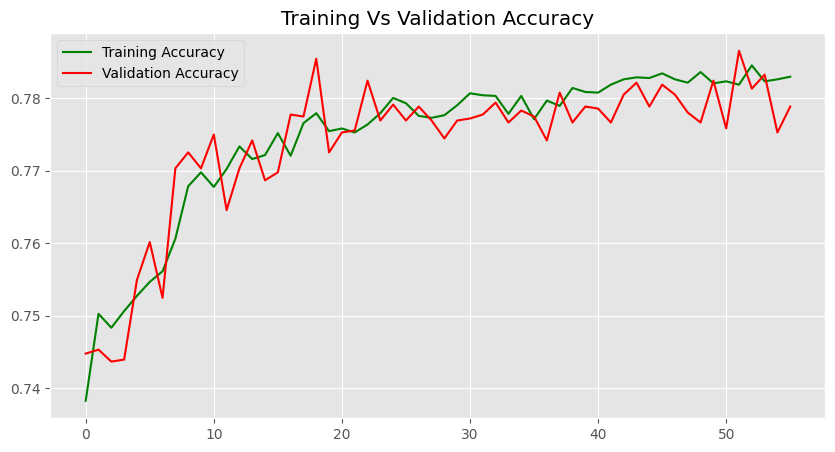

In [210]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

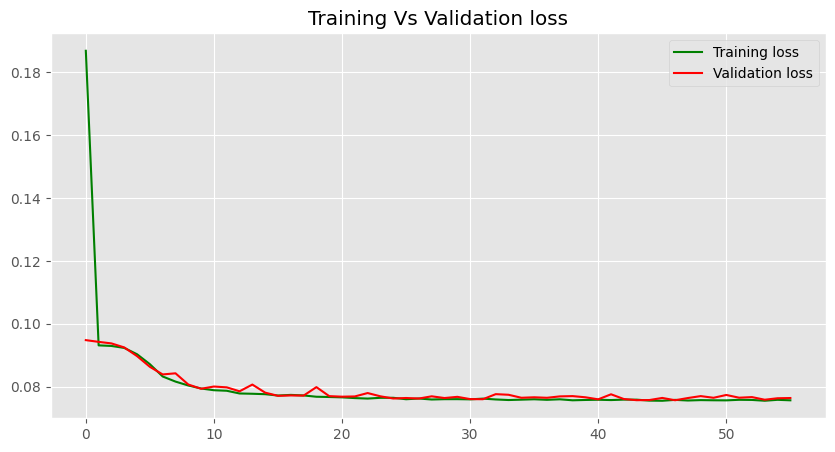

In [211]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()

## Using standardized data instead of normalized data

In [199]:
history = model.fit(
    x1_train,
    y1_train,
    validation_data = (x1_test, y1_test),
    batch_size = 30,
    epochs = 200,
    callbacks=[callback],
    verbose = 1
)

Epoch 1/200
340/340 [==============================] - 4s 9ms/step - loss: 0.6129 - accuracy: 0.7203 - val_loss: 0.5320 - val_accuracy: 0.7312
Epoch 2/200
340/340 [==============================] - 3s 9ms/step - loss: 0.5214 - accuracy: 0.7629 - val_loss: 0.5199 - val_accuracy: 0.7521
Epoch 3/200
340/340 [==============================] - 3s 9ms/step - loss: 0.5102 - accuracy: 0.7732 - val_loss: 0.5186 - val_accuracy: 0.7589
Epoch 4/200
340/340 [==============================] - 3s 9ms/step - loss: 0.5043 - accuracy: 0.7732 - val_loss: 0.5102 - val_accuracy: 0.7821
Epoch 5/200
340/340 [==============================] - 3s 9ms/step - loss: 0.5003 - accuracy: 0.7765 - val_loss: 0.5056 - val_accuracy: 0.7690
Epoch 6/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4976 - accuracy: 0.7774 - val_loss: 0.5052 - val_accuracy: 0.7667
Epoch 7/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4959 - accuracy: 0.7752 - val_loss: 0.5097 - val_accuracy: 0.7855

Epoch 58/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4801 - accuracy: 0.7863 - val_loss: 0.4869 - val_accuracy: 0.7770
Epoch 59/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4804 - accuracy: 0.7859 - val_loss: 0.4896 - val_accuracy: 0.7827
Epoch 60/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4799 - accuracy: 0.7879 - val_loss: 0.4875 - val_accuracy: 0.7816
Epoch 61/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4792 - accuracy: 0.7858 - val_loss: 0.4860 - val_accuracy: 0.7857
Epoch 62/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4799 - accuracy: 0.7879 - val_loss: 0.4868 - val_accuracy: 0.7839
Epoch 63/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4798 - accuracy: 0.7855 - val_loss: 0.4878 - val_accuracy: 0.7827
Epoch 64/200
340/340 [==============================] - 3s 9ms/step - loss: 0.4791 - accuracy: 0.7881 - val_loss: 0.4863 - val_accuracy:

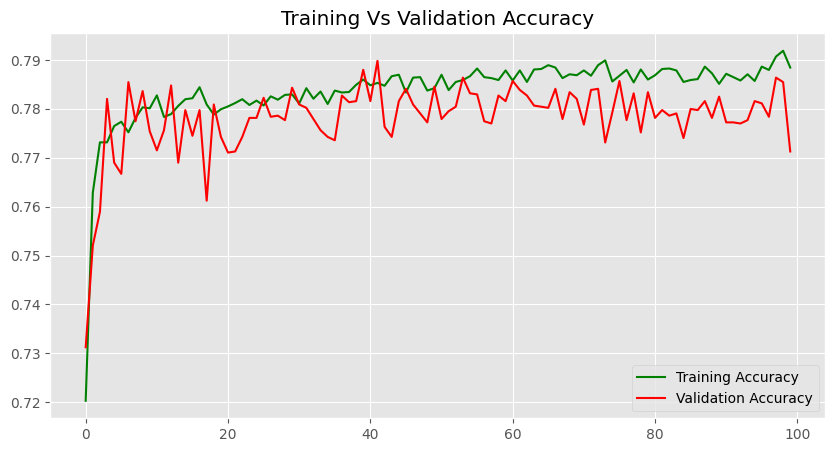

In [200]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

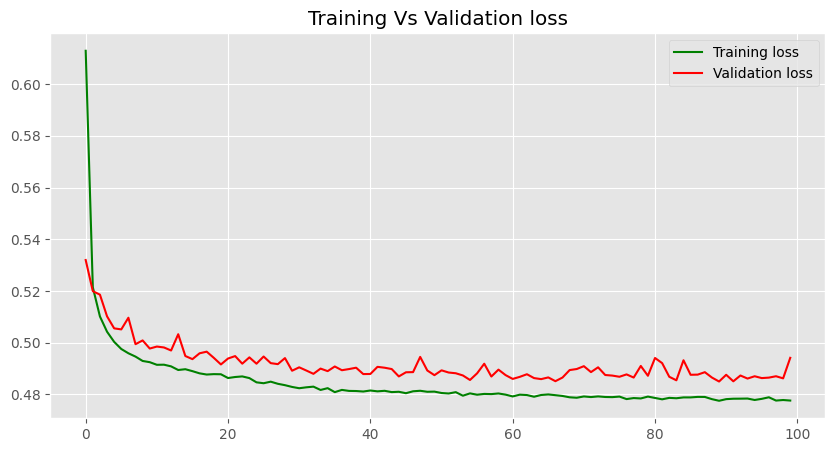

In [201]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()